# Assignment 10: More on Choropleth, Folium Map, and Raster Data

In [ ]:
!pip install mapclassify #helper package
!pip install osmnx
!pip install rioxarray

import geopandas as gpd # import geopandas
import osmnx as ox # import osmnx
import folium as fm # import folium
import rioxarray as rxr #import rioxarray

# packages you already familiar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import shapely.geometry

*NOTE: YOU MAY ENCOUNTER WARNING MESSGAE WHEN RUNNING THE GIVEN CODE AND SOLUTION, PLEASE INGORE IT*

## Q1. Health Network Fairness in Choropleth

### Q1a

1. Key: amenity Values: hospital, doctors, clinic
2. Key: healthcare Values: clinic, hospital, doctor
3. Key: boundary Value: health  

### Q1b

In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
place = 'City of Toronto, canada'
tag = {'amenity': ['hospital', 'clinic']}
toronto_hospital = ox.features_from_place(place, tags=tag)
toronto_hospital = toronto_hospital[toronto_hospital['emergency'] == 'yes'][['name', 'geometry']].reset_index(drop=True)
toronto_hospital['proerpty_type'] = 'hospital'
toronto_hospital['geometry'] = toronto_hospital['geometry'].apply(lambda x: x.centroid)
toronto_hospital.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

,name,geometry,proerpty_type
0,Scarborough Health Network - Centenary Hospital,POINT (-79.20481 43.78025),hospital
1,Centre For Addiction and Mental Health - Queen...,POINT (-79.41864 43.64300),hospital
2,Sunnybrook Health Sciences Centre - Bayview Ca...,POINT (-79.37479 43.72270),hospital
3,Toronto Western Hospital,POINT (-79.40548 43.65351),hospital
4,St. Joseph's Health Centre,POINT (-79.45006 43.64030),hospital


In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
!wget https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
!unzip lfsa000a16a_e.zip -d lfsa000a16a_e

toronto_FSA = gpd.read_file('lfsa000a16a_e')
# 'CFSAUID' start with m
toronto_FSA = toronto_FSA[toronto_FSA['CFSAUID'].str.startswith('M')]
toronto_FSA = toronto_FSA[['CFSAUID', 'geometry']]
toronto_FSA['proerpty_type'] = 'FSA'
toronto_FSA.columns = ['name', 'geometry', 'proerpty_type']
toronto_FSA.head()

--2024-03-31 22:03:48--  https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
Resolving www12.statcan.gc.ca (www12.statcan.gc.ca)... 167.44.105.15
Connecting to www12.statcan.gc.ca (www12.statcan.gc.ca)|167.44.105.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15662579 (15M) [application/x-zip-compressed]
Saving to: ‘lfsa000a16a_e.zip.9’

lfsa000a16a_e.zip.9 100%[===================>]  14.94M   390KB/s    in 38s     

2024-03-31 22:04:26 (405 KB/s) - ‘lfsa000a16a_e.zip.9’ saved [15662579/15662579]

Archive:  lfsa000a16a_e.zip
replace lfsa000a16a_e/lfsa000a16a_e.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

,name,geometry,proerpty_type
637,M9R,"POLYGON ((7209908.140 928259.897, 7209816.766 ...",FSA
638,M9V,"POLYGON ((7206682.694 937743.451, 7206631.563 ...",FSA
639,M9W,"POLYGON ((7210531.760 934710.503, 7210542.117 ...",FSA
701,M1P,"POLYGON ((7233594.731 942118.174, 7233584.157 ...",FSA
702,M1R,"MULTIPOLYGON (((7231166.760 939882.914, 723135...",FSA


In [ ]:
toronto_FSA.to_crs(epsg=4326, inplace=True)

gdf_all = pd.concat([toronto_hospital, toronto_FSA], axis=0, ignore_index=True)
gdf_all.head()


,name,geometry,proerpty_type
0,Scarborough Health Network - Centenary Hospital,POINT (-79.20481 43.78025),hospital
1,Centre For Addiction and Mental Health - Queen...,POINT (-79.41864 43.64300),hospital
2,Sunnybrook Health Sciences Centre - Bayview Ca...,POINT (-79.37479 43.72270),hospital
3,Toronto Western Hospital,POINT (-79.40548 43.65351),hospital
4,St. Joseph's Health Centre,POINT (-79.45006 43.64030),hospital


### Q1c

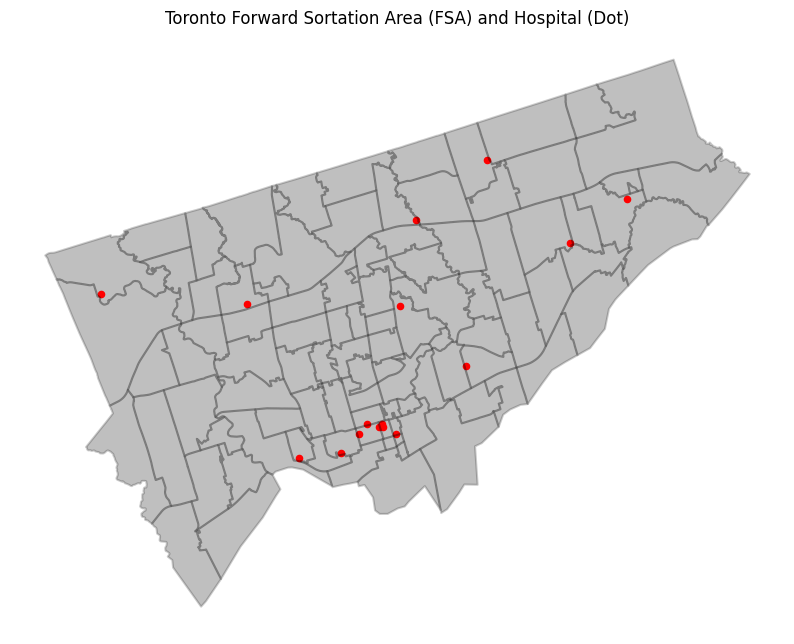

In [ ]:
gdf_all[gdf_all['proerpty_type'] == 'FSA'].plot(figsize=(10, 10), legend=True, color = 'grey',alpha=0.5)
gdf_all[gdf_all['proerpty_type'] == 'hospital'].plot(figsize=(10, 10), legend=True,
                                                           color='red', ax=plt.gca(),alpha=1, markersize=20)
# boundary of the shapefile
gdf_all[gdf_all['proerpty_type'] == 'FSA'].boundary.plot(figsize=(10, 10), color = 'black', ax=plt.gca(),alpha=0.2)
#diplay the choropleth
plt.title('Toronto Forward Sortation Area (FSA) and Hospital (Dot)')
plt.axis('off')
plt.show()

Yes, the hospitals are concentrated in the south this area.

### Q1d

In [ ]:
# calculate the centroid of each row in gdf_all if it is a polygon or MultiPolygon
## Your code here ###
def get_centroid(geom):
    if geom.geom_type == 'Polygon' or geom.geom_type == 'MultiPolygon':
        return geom.centroid
    else:
        return geom

gdf_all_with_centroid = gdf_all.copy() #to easier understand the code
gdf_all_with_centroid['centroid'] = gdf_all_with_centroid['geometry'].apply(get_centroid)
##your code end here ###

In [ ]:
# calculate the distance matrix between each FSA centriod and hospital
fsa_centroid = gdf_all_with_centroid[gdf_all_with_centroid['proerpty_type'] == 'FSA'][['name', 'centroid']]
hospital_centroid = gdf_all_with_centroid[gdf_all_with_centroid['proerpty_type'] == 'hospital'][['name', 'centroid']]

# calculate the distance between each FSA and subway station
def get_distance_matrix(fsa_centroid, hospital_centroid) -> pd.DataFrame:
    '''
    this function is used to calculate the distance matrix between each FSA and subway station

    fsa_centroid: dataframe with the centroid of FSA
    hospital_centroid: dataframe with  the centroid of hospital

    return: a dataframe with the distance between each FSA and subway station
    '''
    distance_matrix = np.zeros((fsa_centroid.shape[0], hospital_centroid.shape[0]))
    for i in range(fsa_centroid.shape[0]):
        for j in range(hospital_centroid.shape[0]):
            distance_matrix[i, j] = fsa_centroid.iloc[i]['centroid'].distance(hospital_centroid.iloc[j]['centroid'])
    distance_matrix = pd.DataFrame(distance_matrix, index=fsa_centroid['name'].to_list(), columns=hospital_centroid['name'])
    return distance_matrix

distance_matrix = get_distance_matrix(fsa_centroid, hospital_centroid)
distance_matrix.head()

name,Scarborough Health Network - Centenary Hospital,Centre For Addiction and Mental Health - Queen Street Site,Sunnybrook Health Sciences Centre - Bayview Campus,Toronto Western Hospital,St. Joseph's Health Centre,Michael Garron Hospital,Etobicoke General Hospital,Humber River Hospital,Scarborough Health Network - General Campus,Scarborough Health Network - Birchmount Hospital,North York General Hospital,Toronto General Hospital,Hospital for Sick Children,Mount Sinai Hospital,Centre For Addiction and Mental Health - College Street Site,St. Michael's Hospital
M9R,0.365086,0.146369,0.186494,0.156309,0.117911,0.233066,0.057618,0.078006,0.317728,0.273428,0.211529,0.172316,0.173130,0.170388,0.161292,0.183388
M9V,0.391324,0.202029,0.220449,0.208868,0.176941,0.274522,0.013983,0.107479,0.346817,0.290978,0.233110,0.222667,0.223731,0.221119,0.212260,0.234141
M9W,0.385836,0.178507,0.209764,0.187347,0.151057,0.259992,0.023838,0.096522,0.339601,0.289709,0.229242,0.202582,0.203500,0.200794,0.191738,0.213871
M1P,0.067660,0.190490,0.111969,0.173655,0.217406,0.090713,0.329641,0.222007,0.022906,0.055718,0.092980,0.157066,0.157537,0.159487,0.165377,0.152953
M1R,0.097361,0.161511,0.082105,0.144695,0.187853,0.065660,0.301504,0.193196,0.049884,0.053526,0.068432,0.128541,0.129104,0.130923,0.136407,0.125230


### Q1e

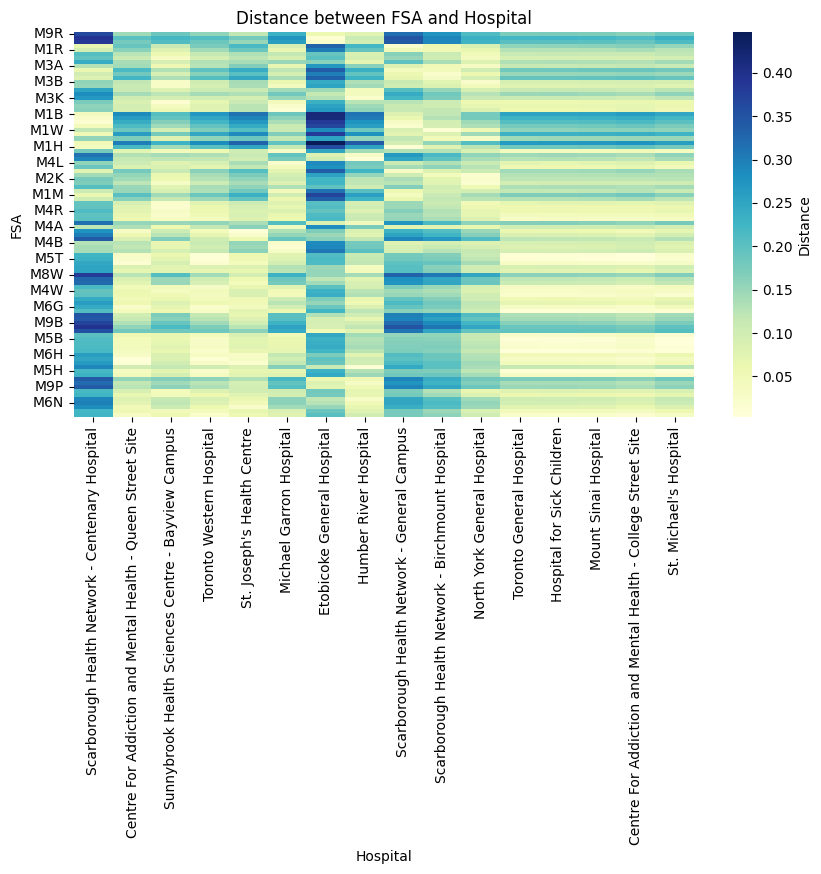

In [ ]:
warnings.filterwarnings('ignore')
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.heatmap(distance_matrix, cmap='YlGnBu', cbar_kws={'label': 'Distance'})
#plot the heatmap
plt.title('Distance between FSA and Hospital')
plt.xlabel('Hospital')
plt.ylabel('FSA')
plt.show()

One difficulty that prevents useful insights is that the heatmap displays too many samples.

## Q2: Visualizing Health Network Fairness


### Q2a

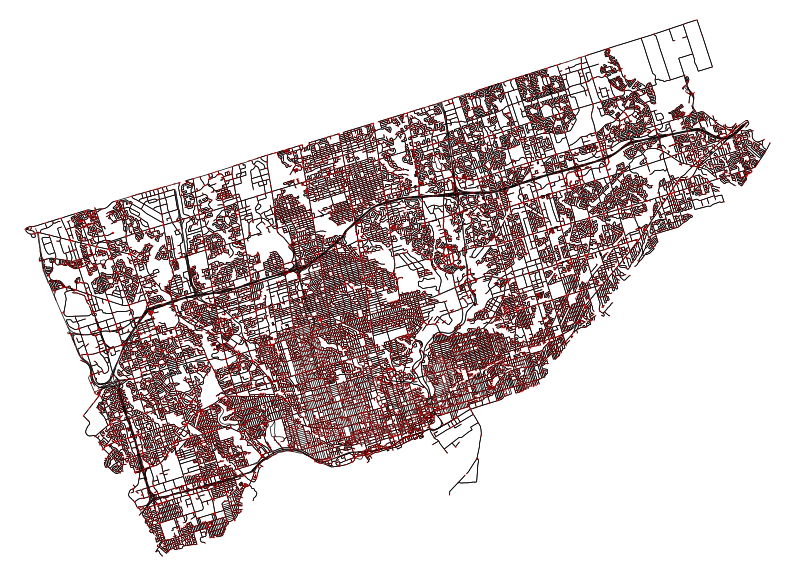

In [ ]:
## you code here ##
place = "City of Toronto, Ontario, Canada" # define the place for data extraction
street_map = ox.graph.graph_from_place(place, network_type='drive') # extract the data, only extract the bike network
ox.plot_graph(street_map, figsize=(10, 10), bgcolor='w',node_size=1, node_alpha=0.5, node_color='r',
              edge_linewidth=0.5, edge_color='k') #show edge only, change node_alpha to 0
plt.show()
# the solution might take > 1 min to run

In [ ]:
print('Number of nodes:', street_map.number_of_nodes()) # print the number of nodes
print('Number of edges:', street_map.number_of_edges()) # print the number of edges

Number of nodes: 27352
Number of edges: 72978


There are 27356 nodes and 72990 edges.

### Q2b

In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
distance_matrix_by_shortest_path = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/distance_matrix_by_shortest_path.csv', index_col=0)
# create a new pandas series to store the nearest distance
smallest_distance_by_shortest_path = distance_matrix_by_shortest_path.min(axis=1)
# assign the name of the series for future merging
smallest_distance_by_shortest_path.name = 'nearest_hospital'

# obtain all row that is a foward sortation area
toronto_FSA.to_crs(epsg=4326, inplace=True)
toronto_FSA['centroid'] = toronto_FSA['geometry'].apply(lambda x: x.centroid)
# merge the distance series with the FSA shape data
gdf_smallest_distance_by_shortest_path = toronto_FSA.merge(smallest_distance_by_shortest_path, left_on='name', right_index=True).rename(columns={0: 'nearest_hospital'})
gdf_smallest_distance_by_shortest_path.head()
# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,geometry,proerpty_type,centroid,nearest_hospital
637,M9R,"POLYGON ((-79.56131 43.67478, -79.56249 43.674...",FSA,POINT (-79.55799 43.68778),6973.215
638,M9V,"POLYGON ((-79.57759 43.76205, -79.57829 43.761...",FSA,POINT (-79.59433 43.74274),1854.019
639,M9W,"POLYGON ((-79.53885 43.72937, -79.53884 43.728...",FSA,POINT (-79.58416 43.70983),2981.682
701,M1P,"POLYGON ((-79.24704 43.75374, -79.24720 43.753...",FSA,POINT (-79.27000 43.76213),2710.604
702,M1R,"MULTIPOLYGON (((-79.28125 43.73867, -79.27985 ...",FSA,POINT (-79.29717 43.74945),4471.884


(-79.6655941753406, -79.08717524093738, 43.5455867505645, 43.870221626780406)

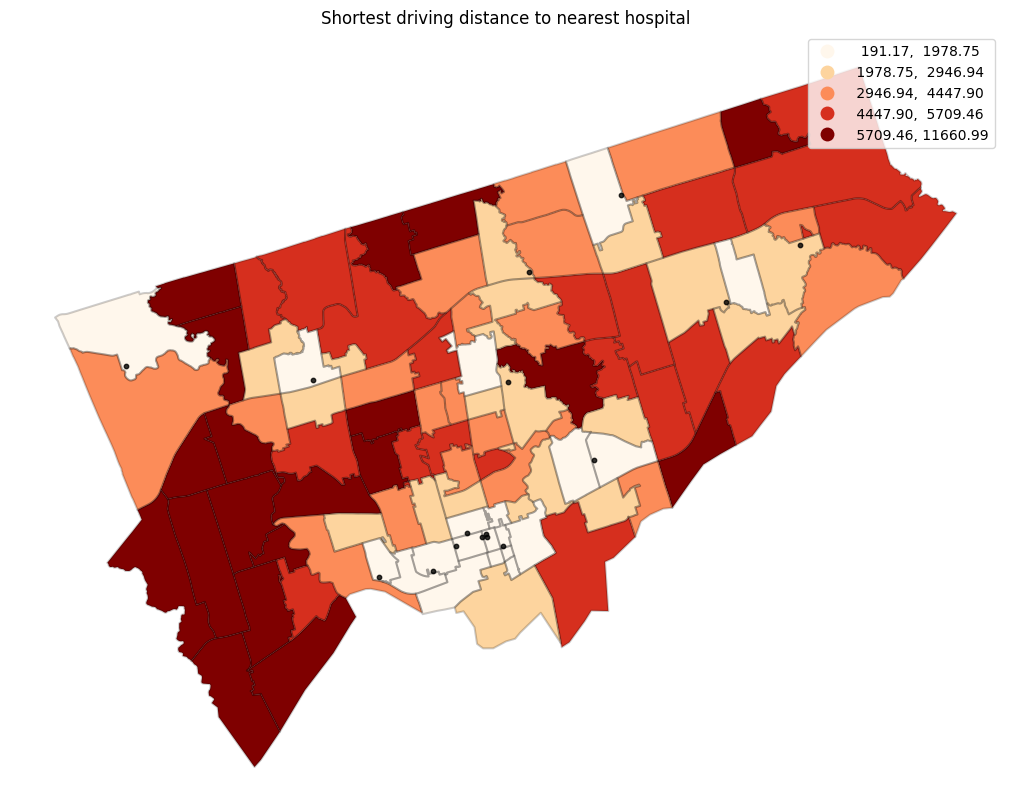

In [ ]:
import networkx as nx
#distance matrix
def get_distance_matrix_by_shortest_path(fsa_centroid, hospital_centroid, graph) -> pd.DataFrame:
    '''
    this function is used to calculate the distance matrix between each FSA and subway station using the shortest path

    graph: the graph object of the route map
    fsa_centroid: dataframe with the centroid of FSA
    hospital_centroid: dataframe with  the centroid of subway station

    return: a dataframe with the distance between each FSA and subway station
    '''
    # too increase the speed, we will first get the node id of each centroid
    fsa_node_id = [ox.distance.nearest_nodes(graph, centroid.x, centroid.y) for centroid in fsa_centroid['centroid'].to_list()]
    hospital_node_id = [ox.distance.nearest_nodes(graph, centroid.x, centroid.y) for centroid in hospital_centroid['centroid'].to_list()]

    # then we will calculate the shortest path length between each FSA and subway station
    distance_matrix = np.zeros((fsa_centroid.shape[0], hospital_centroid.shape[0]))
    for i in range(fsa_centroid.shape[0]):
        for j in range(hospital_centroid.shape[0]):
            distance_matrix[i, j] = nx.shortest_path_length(graph, fsa_node_id[i], hospital_node_id[j], weight='length')
    distance_matrix = pd.DataFrame(distance_matrix, index=fsa_centroid['name'].to_list(), columns=hospital_centroid['name'])
    return distance_matrix

distance_matrix_by_shortest_path = get_distance_matrix_by_shortest_path(fsa_centroid, hospital_centroid, street_map)
#plot
fig, ax = plt.subplots(figsize=(20,10))
smallest_distance = distance_matrix_by_shortest_path.min(axis=1)
# assign the name of the series for future merging
smallest_distance.name = 'distance_to_nearest_hospital'
# obtain all row that is a foward sortation area
gdf_FSA = gdf_all[gdf_all_with_centroid['proerpty_type'] == 'FSA']
# merge the distance series with the FSA shape data
gdf_smallest_distance = gdf_FSA.merge(smallest_distance, left_on='name', right_index=True).rename(columns={0: 'distance_to_nearest_hospital'})

gdf_smallest_distance.plot(column='distance_to_nearest_hospital', legend=True, scheme='quantiles',
              cmap='OrRd', figsize=(10, 10),ax=ax)
gdf_smallest_distance.boundary.plot(figsize=(10, 10), color = 'black',alpha=0.2,ax = ax)
# add hospital
gdf_all[gdf_all['proerpty_type'] == 'hospital'].plot(ax = ax, color='black', alpha=0.8, markersize=10)
ax.set_title('Shortest driving distance to nearest hospital')
ax.axis('off')



The distances become much greater (indicated by a darker color) the further you move from the south central area.

### Q2c

In [ ]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
census_data = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/2016_census.csv').iloc[:, 1:]
census_data.columns = ['name', 'median_income', 'population','visual_minority']
census_data['prec_visual_minority'] = census_data['visual_minority'] / census_data['population']
census_data = toronto_FSA.merge(census_data, on='name')
census_data = census_data[['name','prec_visual_minority','centroid']]
census_data.head()

# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,prec_visual_minority,centroid
0,M9R,0.544557,POINT (-79.55799 43.68778)
1,M9V,0.814882,POINT (-79.59433 43.74274)
2,M9W,0.689214,POINT (-79.58416 43.70983)
3,M1P,0.737640,POINT (-79.27000 43.76213)
4,M1R,0.564003,POINT (-79.29717 43.74945)


In [ ]:
# empty folium map
nearest_hospital_map = fm.Map(location=[43.7, -79.4], zoom_start=12,
                                  scrollWheelZoom=False, tiles=None,
                                    control_scale=True)
# geo-json file with vector shape of FSA
FSA_json = gdf_smallest_distance_by_shortest_path[['name', 'geometry']].to_json()

## you code here ##
fm.TileLayer('openstreetmap',show=False).add_to(nearest_hospital_map) # add the dark matter tile layer, show=False means the layer is not shown by default

# neartest hospital layer
quantile = gdf_smallest_distance['distance_to_nearest_hospital'].quantile([0, 0.25, 0.5, 0.75, 1]).to_list()
fm.Choropleth(
    geo_data=FSA_json,
    name='Distance to the Nearest Hospital',
    data=gdf_smallest_distance,
    columns=['name', 'distance_to_nearest_hospital'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.4,
    line_opacity=0.2,
    bins = quantile,
    legend_name='Distance to the Nearest Hospital'
).add_to(nearest_hospital_map)



# circle marker layer
prec_visual_minority = fm.FeatureGroup(name="prec_visual_minority", control=True).add_to(nearest_hospital_map)
for index, row in census_data.iterrows():
    centroid = [row['centroid'].y, row['centroid'].x]
    fm.CircleMarker(centroid, radius=row['prec_visual_minority']*20, color='blue',
     fill=True, fill_color='blue').add_to(prec_visual_minority)

#layer control
fm.LayerControl().add_to(nearest_hospital_map)
nearest_hospital_map

### Q2d
No because the percentage of visual minors does not have a clear pattern and large percentages of visual minors appear to be in both close and far distance to hospitals.

## Q3: Raster Data (OPTIONAL: THIS QUESTION DOES NOT COUNT TOWARDS THE TOTAL GRADE)

In [ ]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
url = 'https://www.arcgis.com/sharing/rest/content/items/4b1863b58f9a4aa98f3eb4e95299cff2/data'
raster_data = rxr.open_rasterio(url,masked=True).squeeze() # open the raster data

### Q3a

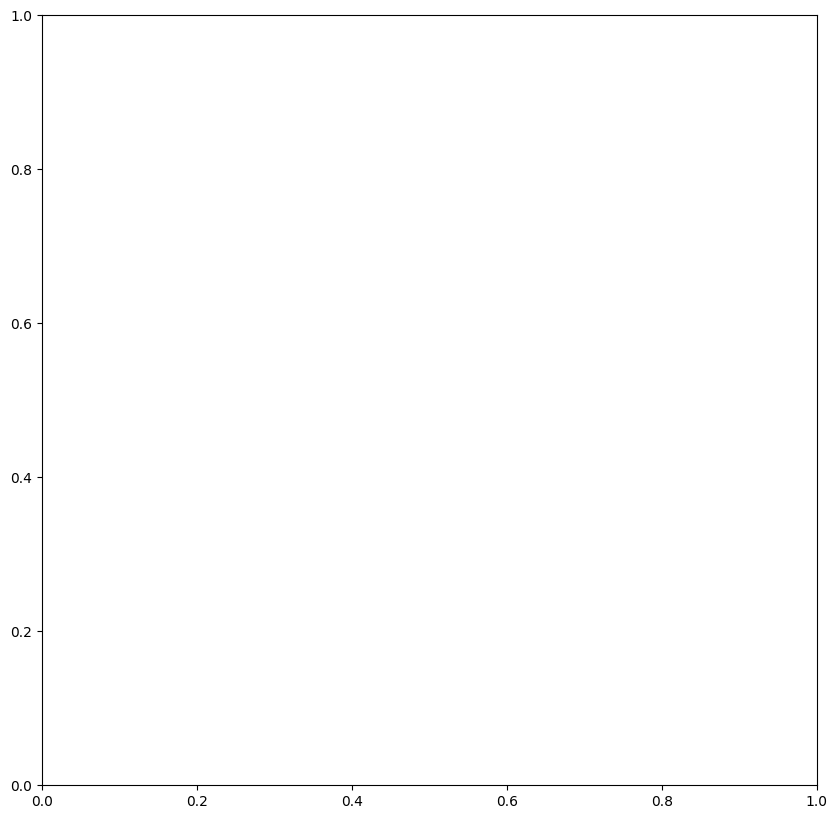

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
## your code here ##
# plot the raster_data
# you might encounter following error when plotting  'ERROR 1: Line 22: </table> doesn't have matching <table>'
# please let the code run, it will generate the plot.

In [ ]:
# what is the shape, the CRS?


**your text answer**

### Q3b

In [ ]:
import xarray as xr
## your code here ##


**you text answer**

### Q3c
**you text answer**